In [1]:
import numpy as np
import scipy as sp
from scipy import io,integrate,sparse,signal

import matplotlib.pyplot as plt

import os,sys
sys.path.insert(0, '..')

from partial_trace import *
#from lanczos_bin import mystep,distribution

from IPython.display import clear_output
np.set_printoptions(linewidth=300)
%load_ext autoreload
%autoreload 2

/Users/muddy_flesh/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
directory = f'data'
data_directory = 'data'

In [3]:
# load parameters
[s,N,N_s] = np.load(f'{directory}/dimensions.npy',allow_pickle=True)
N = int(N)
N_s = int(N_s)

In [4]:
out_all_expr = {}
hs_expr = {}

data_directory = f'data'

out_all = []
hs = []
for file in os.listdir(f'{directory}/{data_directory}'):
    
    # only look at npy files
    if file[-4:] != '.npy':
        continue
    
    data = np.load(f'{directory}/{data_directory}/{file}',allow_pickle=True).item()
    hs.append(data['h'])
    out_all.append(data['out'])

hs,out_all = zip(*sorted(zip(hs,out_all)))
hs = np.array(hs)

hs_full = np.linspace(hs[0],hs[-1],500)

In [5]:
n_βs = 30
βs = np.hstack([[1e5,1e4],1/np.logspace(-3,1.5,n_βs-1)])

ρ_EVs_all = []
vN_entropy_all = []
for hi,h in enumerate(hs):
    Λk,Tr_defl,Θs,Tr_rems_l,Tr_rems_r = out_all[hi]
    E0 = Λk[0]

    ρ_EVs = get_ρ_EVs_all(Λk,Tr_defl,Θs,Tr_rems_l,Tr_rems_r,E0,βs)
    ρ_EVs_all.append(ρ_EVs)
    
    vN_entropy = get_vN_entropy(Λk,Tr_defl,Θs,Tr_rems_l,Tr_rems_r,E0,βs)
    vN_entropy_all.append(vN_entropy)

/var/folders/hp/tl44k8wx1y150p0vdcrq4pjh0000gn/T/ipykernel_63477/961344262.py:9: RuntimeWarning: divide by zero encountered in log
  y = -(1/β)*np.log(ρ_EVs_all_trim[:,βidx])


Text(0.5, 1.0, 'von Neumann entropy (raw data)')

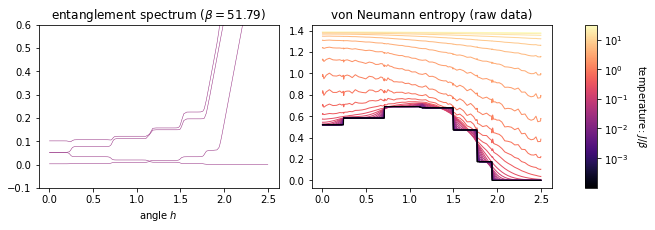

In [6]:
βs_to_int = lambda β: (np.log10(βs[1]) - np.log10(β)) / (np.log10(βs[1])-np.log10(βs[-1]))

fig,axs = plt.subplots(1,3,figsize=(10,3),gridspec_kw={'width_ratios': [1,1,.05]})

βidx = 10
β = βs[βidx]
c = plt.cm.magma(βs_to_int(β))
ρ_EVs_all_trim = np.array(ρ_EVs_all)*(np.array(ρ_EVs_all)>0)
y = -(1/β)*np.log(ρ_EVs_all_trim[:,βidx])
axs[0].plot(hs,y,color=c,lw=.5)
axs[0].set_title(fr'entanglement spectrum ($\beta = {β:1.2f}$)')
axs[0].set_ylim(-.1,.6)

for l,β in enumerate(βs[::-1]):
    c = (plt.cm.magma(βs_to_int(β)))
    
    # get y values for a single temperature
    
    y = np.array(vN_entropy_all)[:,-l-1]
           
    # if β < 5e0:
    #     deg = 10
    #     p = polynomial.chebyshev.Chebyshev.fit(hs,y,deg)
    #     axs[1].plot(hs_full,p(hs_full),color=c,lw=1)

    # elif β < 5e2:
    #     tck = sp.interpolate.splrep(hs,y,s=0)
    #     axs[1].plot(hs_full,sp.interpolate.BSpline(*tck)(hs_full),color=c,lw=1)
    # else:
    #     axs[1].plot(hs,y,color=c,lw=1)
    axs[1].plot(hs,y,color=c,lw=1)
    axs[1].plot(hs,y,color=c,ls='None',ms=4)
            
        
cmap = plt.get_cmap('magma')
sm = plt.cm.ScalarMappable(cmap=cmap)
sm.set_array([])
Ts = np.array([1e-3,1e-2,1e-1,1e0,1e1,1e2])
cbar = plt.colorbar(sm,ticks=βs_to_int(1/Ts),cax=axs[-1])
cbar.ax.set_yticklabels([f'$10^{{{int(np.log10(T))}}}$' for T in Ts]);  # vertically oriented colorbar
axs[-1].set_ylabel('temperature: $J/\\beta$',rotation=-90, labelpad=20)
for i in range(1):
    axs[i].set_xlabel(fr'angle $h$')

# axs[1].set_xlim(2.20,2.4)
# axs[1].set_ylim(0.7,0.8)

# axs[1].set_xlim(1.9,2.3)
# axs[1].set_ylim(1.1,1.2)

axs[1].set_title('von Neumann entropy (raw data)')
